In [40]:
from tensorflow import keras, data
from keras import optimizers, layers
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint
import math
import numpy as np
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
import fastai
from fastai.vision import *

In [28]:
# parameters for this script
batch_size = 9
num_classes = 3
epochs = 25

In [29]:
def generate_data():


  from google.colab import drive
  drive.mount('/content/drive')
  
  #Append the directory to your python path using sys
  import sys
  import os
  prefix = '/content/drive/My Drive/'
  # modify "customized_path_to_your_homework" here to where you uploaded your homework
  customized_path_to_your_homework = 'Colab Notebooks/'
  sys_path = prefix + customized_path_to_your_homework
  sys.path.append(sys_path)
  # print(sys.path)

  fn_data = os.path.join(sys_path, 'Iris')
  print('Path to data: {}'.format(fn_data))

  training_ds = keras.preprocessing.image_dataset_from_directory(
    fn_data,
    validation_split=0.2,
    subset= "training",
    seed=64,
    image_size= (256, 256),
    batch_size=batch_size
    )

  validation_ds = keras.preprocessing.image_dataset_from_directory(
    fn_data,
    validation_split=0.2,
    subset= "validation",
    seed=64,
    image_size= (256, 256),
    batch_size=batch_size
    )
  
  return training_ds, validation_ds

In [31]:
train_ds, validate_ds = generate_data()
print(train_ds)
print(validate_ds)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Path to data: /content/drive/My Drive/Colab Notebooks/Iris
Found 573 files belonging to 3 classes.
Using 459 files for training.
Found 573 files belonging to 3 classes.
Using 114 files for validation.
<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


['Setosa', 'Versicolour', 'Virginica']


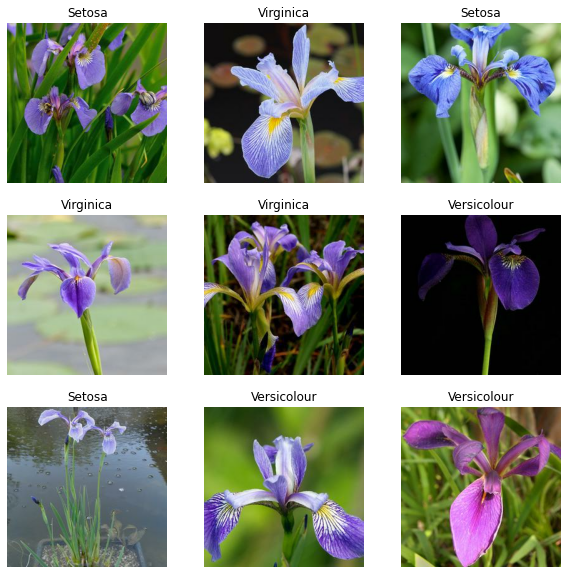

In [90]:
class_names = train_ds.class_names
print(class_names)

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    plt.subplot(3, 3, i + 1)
    '''
    TO-DO: Write the code to print the i-th image from the training set. Make 
    sure that each image doesn't contain numeric values along both axes. The 
    output should show only the images and their labels.
    '''
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

plt.show()

In [36]:
model = keras.models.Sequential([
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.1),
  layers.Conv2D(64, 3, activation='relu'),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.1),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.1),
  layers.Dense(len(class_names), activation= 'softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

value = model.fit(train_ds,validation_data= validate_ds,epochs = 40)


Epoch 1/40
51/51 [==============================] - 9s 149ms/step - loss: 2.5430 - accuracy: 0.4205 - val_loss: 1.0933 - val_accuracy: 0.4386
Epoch 2/40
51/51 [==============================] - 7s 143ms/step - loss: 1.0762 - accuracy: 0.4771 - val_loss: 1.0807 - val_accuracy: 0.4386
Epoch 3/40
51/51 [==============================] - 8s 146ms/step - loss: 1.0600 - accuracy: 0.4771 - val_loss: 1.0781 - val_accuracy: 0.4386
Epoch 4/40
51/51 [==============================] - 8s 144ms/step - loss: 1.0419 - accuracy: 0.4793 - val_loss: 1.0786 - val_accuracy: 0.4386
Epoch 5/40
51/51 [==============================] - 8s 144ms/step - loss: 0.9973 - accuracy: 0.5142 - val_loss: 1.0597 - val_accuracy: 0.4474
Epoch 6/40
51/51 [==============================] - 7s 143ms/step - loss: 0.5984 - accuracy: 0.7691 - val_loss: 2.2556 - val_accuracy: 0.6579
Epoch 7/40
51/51 [==============================] - 8s 145ms/step - loss: 0.2924 - accuracy: 0.9020 - val_loss: 1.4719 - val_accuracy: 0.6579
Epoch 

In [86]:
tf = get_transforms(max_rotate=25)
def augment(image,pr,numb):
    
    X = list()
    for lop in range(0,numb):
            pr = pr + 1
            new_image = open_image(image)
            augmented_image = new_image.apply_tfms(tf[0], new_image, xtra={tf[1][0].tfm: {"size": 224}}, size=224)
            X.append(augmented_image)
    return X
            

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


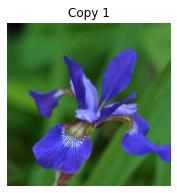

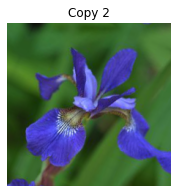

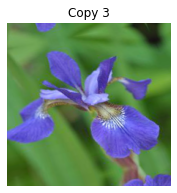

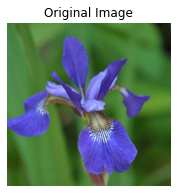

In [89]:
from google.colab import drive
drive.mount('/content/drive')
  
  #Append the directory to your python path using sys
import sys
import os
prefix = '/content/drive/My Drive/'
  # modify "customized_path_to_your_homework" here to where you uploaded your homework
customized_path_to_your_homework = 'Colab Notebooks/'
sys_path = prefix + customized_path_to_your_homework
sys.path.append(sys_path)
  # print(sys.path)

fn_data = os.path.join(sys_path, 'Iris/Setosa/iris-0c826b6f4648edf507e0cafdab53712bb6fd1f04dab453cee8db774a728dd640.jpg')

pr = 20
numb = 3
for imagen in [fn_data]:
    X_sample=augment(imagen,pr,numb)
    pr = pr + numb
for i in range(0,3):
    X_sample[i].show( title=f'Copy {i+1}')
original_image = open_image(fn_data)
original_image.show(title='Original Image')

In [21]:
from google.colab import drive
drive.mount('/content/drive')
  
  #Append the directory to your python path using sys
import sys
import os
prefix = '/content/drive/My Drive/'
  # modify "customized_path_to_your_homework" here to where you uploaded your homework
customized_path_to_your_homework = 'Colab Notebooks/'
sys_path = prefix + customized_path_to_your_homework
sys.path.append(sys_path)
  # print(sys.path)

fn_data = os.path.join(sys_path, 'Iris/')



pr = 20
numb = 3
path = Path(fn_data)
path_hr = path/'Setosa'
destination = './'
count = 0
il = ImageList.from_folder(path_hr)
for i in il.items:
    X=augment(i,pr,numb)
    for j in X:
        image_name = Path('setosa_'+str(count)+'.jpg')
        count = count+1
        dest = destination/image_name
        j.save(dest)
    
    real_image = open_image(i)
    image_name = Path('setosa_'+str(count)+'.jpg')
    count = count+1
    dest = path_hr/image_name
    real_image.save(dest)
    
    pr = pr + numb
    
    



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
from google.colab import drive
drive.mount('/content/drive')
  
  #Append the directory to your python path using sys
import sys
import os
prefix = '/content/drive/My Drive/'
  # modify "customized_path_to_your_homework" here to where you uploaded your homework
customized_path_to_your_homework = 'Colab Notebooks/'
sys_path = prefix + customized_path_to_your_homework
sys.path.append(sys_path)
  # print(sys.path)

fn_data = os.path.join(sys_path, 'Iris/')



pr = 20
numb = 3
path = Path(fn_data)
path_hr = path/'Virginica'
destination = './'
count = 0
il = ImageList.from_folder(path_hr)
for i in il.items:
    X=augment(i,pr,numb)
    for j in X:
        image_name = Path('virginica_'+str(count)+'.jpg')
        count = count+1
        dest = destination/image_name
        j.save(dest)
    
    real_image = open_image(i)
    image_name = Path('virginica_'+str(count)+'.jpg')
    count = count+1
    dest = path_hr/image_name
    real_image.save(dest)
    
    pr = pr + numb
    
    



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
